## Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/features_target.csv", sep=";")

In [43]:
df

,id,slope,cd_water,aspect,hill90,hill5,hill45,clc00,numpoints,target
0,1,4.98010,0.256047,9,254,0,195,312,0,0
1,2,3.36810,0.296268,2,254,0,187,312,0,0
2,3,3.86523,0.374666,2,254,0,186,312,0,0
3,4,5.56061,0.471633,2,253,0,191,312,0,0
4,5,9.50320,0.589352,10,251,0,204,312,0,0
...,...,...,...,...,...,...,...,...,...,...
35250,35251,4.77809,0.000000,7,254,18,177,523,0,0
35251,35252,6.62570,0.000000,7,253,11,171,523,0,0
35252,35253,8.22308,0.000000,6,252,0,161,523,0,0
35253,35254,7.51513,0.000000,6,252,0,156,523,0,0


In [3]:
cat_cols = ["aspect", "clc00"]
num_cols = ["slope", "cd_water", "hill5", "hill45", "hill90"]

## Data visualization, sources, caracteristics

### EDA

In [4]:
# numbre de lines et de colonnes
df.shape

(35255, 10)

On possède de 35255 lines et 10 colonnes. Donc 352550 pixeles au totale

In [8]:
# hopefuly we haven't any nan values
df.isna().sum()

id           0
slope        0
cd_water     0
aspect       0
hill90       0
hill5        0
hill45       0
clc00        0
numpoints    0
target       0
dtype: int64

In [6]:
from matplotlib import pyplot as plt

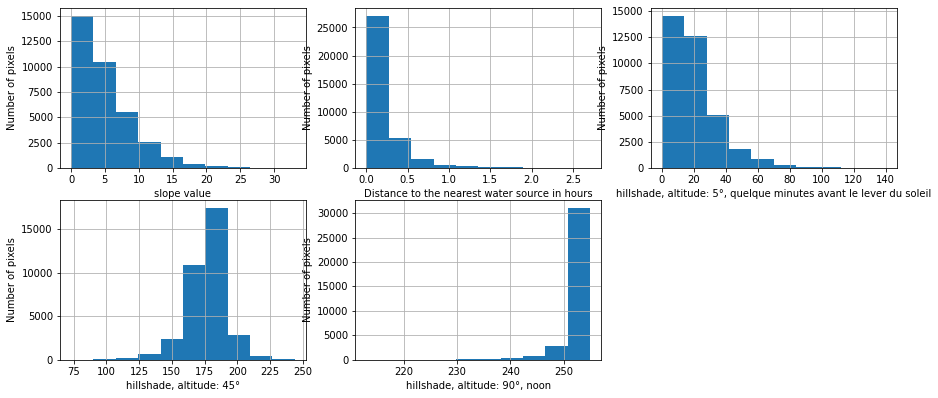

In [7]:
# распределение данных. гистограммы

plt.figure(figsize=(15,10));

plt.subplot(3, 3, 1)
fig = df.slope.hist(bins=10)
fig.set_xlabel('slope value')
fig.set_ylabel('Number of pixels')

plt.subplot(3, 3, 2)
fig = df.cd_water.hist(bins=10)
fig.set_xlabel('Distance to the nearest water source in hours')
fig.set_ylabel('Number of pixels')

plt.subplot(3, 3, 3)
fig = df.hill5.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 5°, quelque minutes avant le lever du soleil')
fig.set_ylabel('Number of pixels')

plt.subplot(3, 3, 4)
fig = df.hill45.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 45°')
fig.set_ylabel('Number of pixels')

plt.subplot(3, 3, 5)
fig = df.hill90.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 90°, noon')
fig.set_ylabel('Number of pixels');

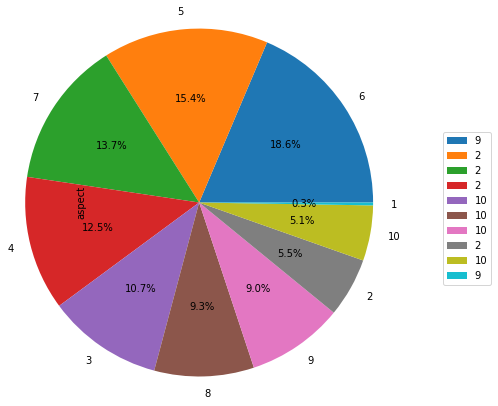

In [49]:
# круговые диаграммы
asp = pd.DataFrame(df.aspect.value_counts())
asp.plot.pie(subplots=True, autopct='%1.1f%%', radius=2);
plt.legend(df.aspect, bbox_to_anchor=(1.2, 0.2), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure);

In [50]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html/

In [51]:
import seaborn as sns

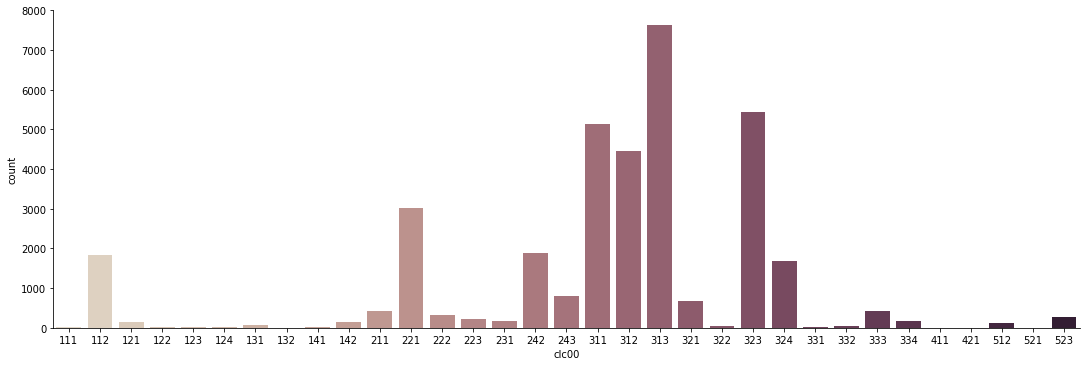

In [52]:
sns.catplot(x="clc00", kind="count", palette="ch:.25", height=5, aspect=15/5, data=df);

In [53]:
# description/explanation/observations

### Type d'occupation du sol

- types en pourcentage
- carte

# Il faut regarder le target class après avoir divisée les donnée en train et test sets
## Target feature
#### Распределение целевой переменной / баланс классов

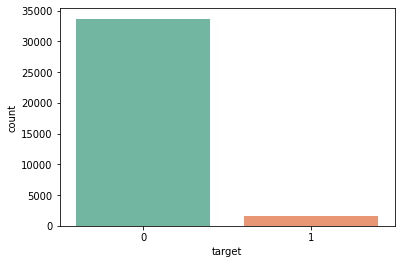

In [54]:
ax = sns.countplot(x="target", data=df, palette="Set2")
plt.show()

In [55]:
# en pourcentage
df['target'].value_counts()/len(df) * 100

0    95.529712
1     4.470288
Name: target, dtype: float64

### Выводы:
- Il ya deux target classes: 
  - 0: abscence (95.5%), 
  - 1: presence (4.5%). 
- Nous avons des classes inbalancées

### Correlation matrix

In [56]:
# для correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# figsize=(7, 20)

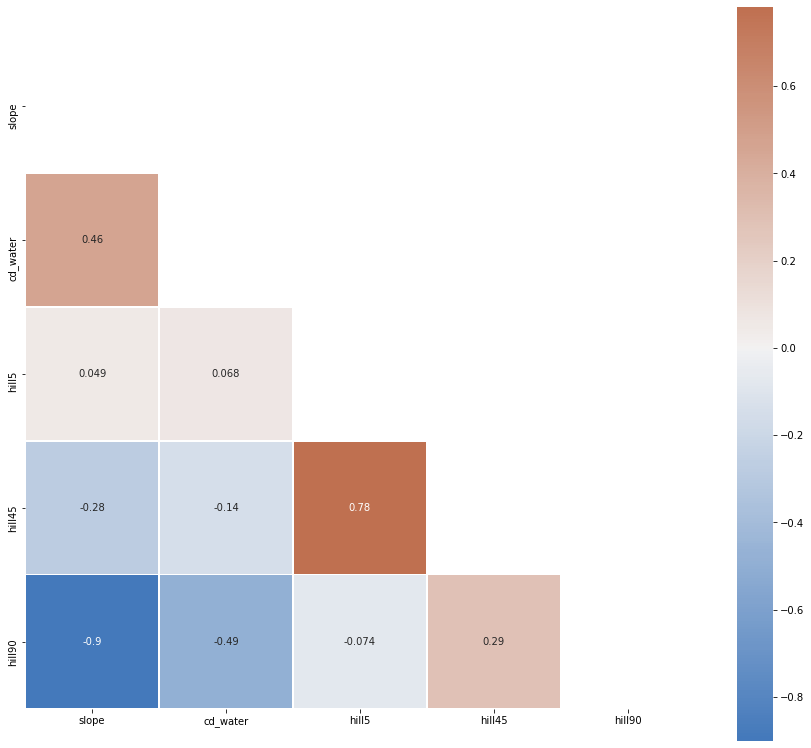

In [58]:
# отрисуем correlation heatmap
corr = df[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, 
            center=0,square=True, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .9});

### Split dataset

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df.head()

,id,slope,cd_water,aspect,hill90,hill5,hill45,clc00,numpoints,target
0,1,4.98010,0.256047,9,254,0,195,312,0,0
1,2,3.36810,0.296268,2,254,0,187,312,0,0
2,3,3.86523,0.374666,2,254,0,186,312,0,0
3,4,5.56061,0.471633,2,253,0,191,312,0,0
4,5,9.50320,0.589352,10,251,0,204,312,0,0


In [61]:
X = df.drop(["id", "numpoints", "target"], axis=1)
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
X_train.shape, X_test.shape


In [ ]:
X.to_csv(index=False)

In [118]:
# --------------------

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
X_train.shape, X_test.shape

# encode categorical features in train set
X_train = pd.concat([X_train[num_cols], 
                    pd.get_dummies(X_train.aspect), 
                    pd.get_dummies(X_train.clc00)], axis=1)

X_train.shape

# encode categorical features in test set
X_test = pd.concat([X_test[num_cols], 
                    pd.get_dummies(X_test.aspect), 
                    pd.get_dummies(X_test.clc00)], axis=1)

X_test.shape

# убедимся, что в обеих выборках оказалось одинакове количество признаков
print('Количество признаков в train:', len(X_train.columns))
print('Количество признаков в valid:', len(X_test.columns))
# для случая, если это не так
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

Количество признаков в train: 47
Количество признаков в valid: 47
{411}
{421}


In [120]:
# --------------------

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
X_train.shape, X_test.shape

((24678, 7), (10577, 7))

In order to not make the data leaks, we going to make all the data ingeneering after spliting the dataset

### Encode categorical features

In [116]:
# encode categorical features in train set
X_train = pd.concat([X_train[num_cols], 
                    pd.get_dummies(X_train.aspect), 
                    pd.get_dummies(X_train.clc00)], axis=1)

X_train.shape

(24678, 48)

In [117]:
# encode categorical features in test set
X_test = pd.concat([X_test[num_cols], 
                    pd.get_dummies(X_test.aspect), 
                    pd.get_dummies(X_test.clc00)], axis=1)

X_test.shape

(10577, 45)

In [108]:
# убедимся, что в обеих выборках оказалось одинакове количество признаков
print('Количество признаков в train:', len(X_train.columns))
print('Количество признаков в valid:', len(X_test.columns))
# для случая, если это не так
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

Количество признаков в train: 47
Количество признаков в valid: 47
{421}
{411}


In [159]:
X_train.drop([411], axis=1)
X_test.drop([421], axis=1)

,slope,cd_water,hill5,hill45,hill90,1,2,3,4,5,...,322,323,324,331,332,333,334,512,521,523
16353,12.17550,0.399119,0,142,249,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
34991,1.49100,0.097312,25,182,254,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20364,1.40392,0.128824,23,181,254,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24331,2.38758,0.072972,12,172,254,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6212,9.60465,0.177614,0,167,251,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26402,5.51244,0.195880,0,161,253,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16554,1.55197,0.066846,15,175,254,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4823,6.92818,0.769416,0,159,253,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30513,6.85376,0.145873,30,184,253,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have 3 datasets to work with:
- train (19830 objects (rows))
- valid (6611 objects)
- test (8814 objects)

### Random Forest

### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [168]:
# learn model. Let's create a classifier (model) random forest (cls_rf)
# default values?
clf_rf = RandomForestClassifier(n_estimators=200,
                                criterion='entropy',
                                max_depth=15,
                                random_state=42)

clf_rf1 = clf_rf.fit(X_train, y_train)

In [169]:
# predictions
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, clf_rf1.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_test, clf_rf1.predict_proba(X_test)[:,1]))

ROC-AUC для обучающей выборки:     0.9819728002890791
ROC-AUC для валидационной выборки: 0.6195884060868989


In [ ]:
# RandomizedSearchCV

In [175]:
# GridSearchCV based on data obtained in RandomizedSearchCV

clf_rf = RandomForestClassifier(random_state=42)

params_rf = {'max_depth': [20, 26],
             'min_samples_split': [6, 7],
             'min_samples_leaf': [3, 5],
             'n_estimators':[200, 350, 600]}

search_rf_grid = GridSearchCV(clf_rf, params_rf, 
                                cv=5, n_jobs=-1)

search_rf_grid.fit(X_train, y_train)
search_rf_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 200}

In [176]:
# predictions
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, search_rf_grid.predict_proba(X_train)[:,1]))
print('ROC-AUC для валидационной выборки:', roc_auc_score(y_test, search_rf_grid.predict_proba(X_test)[:,1]))

ROC-AUC для обучающей выборки:     0.9751290664807163
ROC-AUC для валидационной выборки: 0.616873292287433


In [178]:
best_rf = RandomForestClassifier(n_estimators=800,
                                 criterion='entropy',
                                 max_depth=5,
                                 min_samples_split=4,  
                                 min_samples_leaf=1, 
                                 random_state=42)

best_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       n_estimators=800, random_state=42)

In [179]:
# predictions
y_pred = best_rf.predict_proba(X_test)[:,1]
# y_true is y_test

# score
print('ROC-AUC для обучающей выборки:    ', roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]))
# print('ROC-AUC для валидационной выборки:',  roc_auc_score(y_valid, y_pred))
print('ROC-AUC для тестовой выборки:     ',  roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

ROC-AUC для обучающей выборки:     0.7166262637876225
ROC-AUC для тестовой выборки:      0.6263397676407525


## Visualization

ROC-AUC = 0.6263397676407525
Time taken = 16.503920793533325
              precision    recall  f1-score   support

           0    0.95859   1.00000   0.97886     10139
           1    0.00000   0.00000   0.00000       438

    accuracy                        0.95859     10577
   macro avg    0.47929   0.50000   0.48943     10577
weighted avg    0.91889   0.95859   0.93832     10577



/home/berthakim/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/berthakim/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/berthakim/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


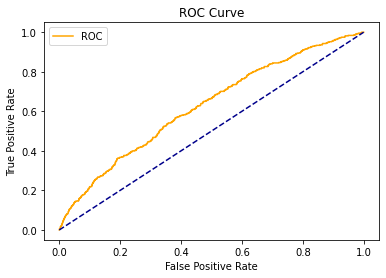

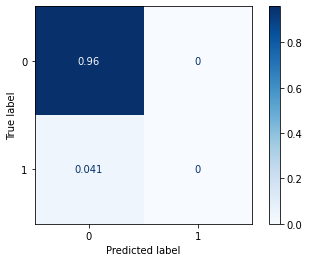

In [181]:
# функция для обучения модели и подсчета roc-auc
import time
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, roc_curve, classification_report

def run_model(model, X_train, y_train, xtest, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc_prob = roc_auc_score(y_test, y_pred_prob)
    time_taken = time.time()-t0
    print("ROC-AUC = {}".format(roc_auc_prob))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred,digits=5))
    
    # probs = model.predict_proba(X_test)[:, 1]
    fper, tper, thresholds = roc_curve(y_test, y_pred_prob) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc_prob, time_taken

# отрисовка ROC кривой и confusion matrix
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
model_rf, roc_auc_rf, tt_rf = run_model(best_rf, X_train, y_train, X_test, y_test)

## If performance is not satisfactory...

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Есть три общих подхода к улучшению существующей модели машинного обучения:

- Используйте больше (высококачественных) данных и функций
- Настроить гиперпараметры алгоритма
- Попробуйте другие алгоритмы

Они представлены в том порядке, в котором я их обычно пробую.


- отбор фичей, уменьшение их количества
- Другие способы уменьшения количества признаков: PCA, ICA 

## Improve quality

- feature importance
- feature engeeniring
- configure parameters
- enrichir les données? - See Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.

### Варьируем число фолдов

In [183]:
e = []
for n in range(3, 7):
    model_rf = RandomForestClassifier(random_state=42)
    params_grid = {'max_depth':[5], "n_estimators":[350], 'criterion':['entropy']}
    search_grid = GridSearchCV(model_rf, params_grid, n_jobs=-1, cv=n)
    search_grid.fit(X_train, y_train)
    y_pred = search_grid.predict_proba(X_train)[:,1]
    auc = roc_auc_score(y_train, y_pred)
    print("cv =", n, ":", auc)
    e.append(auc)

cv = 3 : 0.7192250449072961
cv = 4 : 0.7192250449072961
cv = 5 : 0.7192250449072961
cv = 6 : 0.7192250449072961


In [ ]:
e = []
for n in range(3, 7):
    model_rf = RandomForestClassifier(random_state=42)
    params_grid = {'max_depth':[5], "n_estimators":[350], 'criterion':['entropy']}
    search_grid = GridSearchCV(model_rf, params_grid, n_jobs=-1, cv=n)
    search_grid.fit(X_train, y_train)
    y_pred = search_grid.predict_proba(X_train)[:,1]
    auc = roc_auc_score(y_train, y_pred)
    print("cv =", n, ":", auc)
    e.append(auc)

Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.
Faut-il ajouter les données

coursera-yandex-mipt-обучение-на-размеченных-данных

Проанализировать, как качество на обучении и тесте меняется в зависимости от объема обучающей выборки.

Объем обучающей выборки и сложность модели значительно сказываются на времени построения модели. С этой точки зрения строить кривые обучения очень полезно — можно проанализировать, имеет ли смысл добавлять больше данных в обучение.

Вместо поиска по сетке решим другую задачу — проанализируем, как зависит качество модели от количества обучающих объектов выборки. как зависит качество модели от количества обучающих объектов выборки?

Для этого давайте создадим нашу модель. Для начала будем строить случайный лес над 50 деревьями, каждый из которых будет иметь глубину не больше 2. Создаем такой объект


## Зависимость качества обучения от объема обучающей выборки

In [184]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn import ensemble, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/berthakim/miniconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'e', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [185]:
clf_rf = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

И теперь давайте построим следующий график — нам будет интересно посмотреть, как меняется качество на обучающей и тестовой выборке, в зависимости от того, на скольких объектах мы обучаемся.

Для того чтобы получить такие графики, у sklearn есть специальная функция под названием learning_curve. Она позволяет нам сделать следующее — ей можно передать на вход нужный нам алгоритм, передать данные и целевую функцию, а также сказать, в каких пропорциях мы хотим обучаться, то есть на каких долях обучающей выборки мы хотим строить модель.

После этого с помощью этого метода будут построены несколько моделей, мы получим оценку качества на каждом объеме обучающей выборки, и нам будут возвращены размер обучающей выборки, оценки качества на «трейне» и оценка качества на тесте.

Имея такие данные, мы легко сможем проанализировать, как качество на обучении и тесте меняется от объема обучающей выборки. Вот давайте сделаем такую вещь.

Мы передаем в функцию наш классификатор, который мы создали ранее. Далее передаем туда данные, которые мы также подготовили на предварительном шаге. И говорим, что мы будем обучать модель на следующих данных: сначала мы возьмем 0,1 от обучающей выборки и далее будем двигаться с шагом 0,2 до 1. Оценивать качество будем с помощью уже знакомой нам метрики roc-auc и будем делать кросс-валидацию на 3 фолда. Давайте запустим.


In [186]:
# max_depth=5, 100% of data

train_sizes, train_scores, test_scores = learning_curve(clf_rf, X_train, y_train, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')

In [187]:
X_train.shape

(24678, 47)

In [188]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 1974  5922  9871 13819 17767]
[0.74475675 0.68767969 0.66743736 0.65714336 0.65385532]
[0.61833294 0.62964282 0.62767932 0.63238858 0.63264683]


Ну для начала мы видим, что train_sizes — размер обучающей выборки — был преобразован из долей в конкретное количество объектов, на которых мы обучались. То есть мы видим, что минимальное количество обучающих объектов в рамках нашего эксперимента составляет 250, максимальное — 2250. Также нам доступны оценки качества на обучении и оценки качества на тесте. Так как у нас проводилась кросс-валидация, я сразу же сделала усреднение по всем фолдам — это делается с помощью команды mean. Аргумент axis = 1 означает, что мы будем усреднять по строчкам. Вот в данном случае каждая строка — это результат измерения кросс-валидации, поэтому нам это подходит.

Теперь давайте построим график. Сразу добавим на график сетку и будем строить две кривые — качество обучения на обучающей выборке и на тестовой выборке.


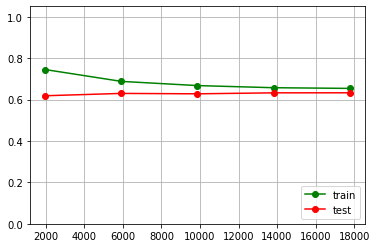

In [189]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

Давайте посмотрим. Так, мы видим, что в начале качество на обучающей выборке падает — приблизительно до отметки 1250 деревьев, и дальше качество меняется очень медленно. С другой стороны, на тестовой выборке качество продолжает расти приблизительно до этой же точки, и дальше оно также перестает меняться. Какой вывод мы можем сделать из этого? Дальнейший рост обучающей выборки вряд ли скажется на качестве нашей модели. Это говорит о том, что модель данной сложности не может многое выиграть за счет того, что мы обогатим данные. Что же делать в такой ситуации? Кривые обучения для деревьев большей глубины

Давайте попробуем увеличить сложность модели — возможно, это приведет к улучшению ее качества. Так как мы с вами обучали модель на деревьях глубины 2, давайте увеличим глубину деревьев — это даст нам дополнительные возможности.

Снова создаем классификатор RandomForestClassifier, но в этот раз указываем ему параметр max_depth = 10 — это максимально возможная глубина деревьев.


### А вообще нужно решить проблему несбалансированности выборки

<...>

[ 1974  5922  9871 13819 17767]
[0.76254591 0.69129321 0.67820807 0.66480412 0.65797235]
[0.60954727 0.62823359 0.62721813 0.63272581 0.63420853]


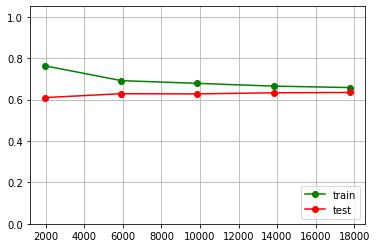

In [191]:
# max_depth=18
clf_rf = ensemble.RandomForestClassifier(n_estimators = 600, max_depth = 2, random_state = 1)


# Теперь давайте еще раз запустим команду learning_curve и 
# построим кривую обучения на тесте и на обучении, при этом 
# мы будем делать это по тем же самым точкам, по тем же 
# самым долям обучающей выборки.
train_sizes, train_scores, test_scores = learning_curve(clf_rf, X_train, y_train, 
                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=5, scoring='roc_auc')
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right');

### Results

При 50 деревьях не хватает обобщающей способности модели

## Feature Importance

Отбор признаков является важным этапом построения алгоритмов машинногообучения. Данный этап необходим, чтобы избавиться от шумовых признаков и бла-годаря этому улучшить качество и ускорить работу алгоритмов. Проведенные экспе-рименты подтверждают, что алгоритмы отбора признаков с помощью Random Forestэффективно справляется со своей задачей
http://www.machinelearning.ru/wiki/images/9/96/RysmyatovaCourseFile.pdf

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. The actual calculation of the importance is beyond the scope of this post, but we can use the numbers to make relative comparisons between variables.

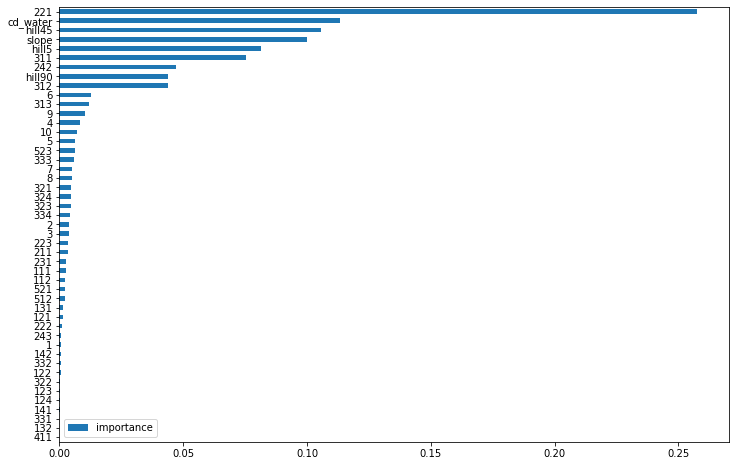

In [193]:
# Код для отрисовки важности фичей 1

imp = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));